In [1]:
print("hello")

hello

In [2]:
using LazyArrays

In [8]:
X = [1 2; 3 3]

2×2 Matrix{Int64}:
 1  2
 3  3

In [9]:
CartesianIndices(X)

2×2 CartesianIndices{2, Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}}}:
 CartesianIndex(1, 1)  CartesianIndex(1, 2)
 CartesianIndex(2, 1)  CartesianIndex(2, 2)

In [4]:
for x in X
    print(x)
end

1323

In [5]:
X = [1 2 3]
n = 2
for i in 1:n
    for x in X
        println("epoch $i:$x")
    end
end

epoch 1:1
epoch 1:2
epoch 1:3
epoch 2:1
epoch 2:2
epoch 2:3


In [6]:
@show X;

X = [1 2 3]


异步和网络编程 很有关系
如果要等外部数据，就要等很久

异步模型不涉及到多线程，是更底层的，属于多线程的准备阶段。
把任务分为：任务的创建和执行。

一般来说，异步模型本身不会加速，只有遇到网络、硬盘等东西的时候会让代码更快。

必须得先有异步，才能有多线程。

CPU级别的并行——@simd——一般不讨论

因为线程共享内存，有个严重的问题：data racing

data racing 只会发生在“写”的时候

要解决这个需要加锁：
lock: async -> sync
但是会增加开销

- Thread 操作系统的kernel thread
- coroutine(Green Thread)：把同样的概念放到Julia内部，虚拟出来的user thread，节省了操作系统的context switch时间
- GIL in Python

In [1]:
l = Threads.ReentrantLock()
lock(l)
println("lock1")
lock(l)
println("lock2")

lock1
lock2


In [2]:
using Pkg
Pkg.add("ThreadPools")

    Updating registry at `C:\Users\james\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Libffi_jll ── v3.2.2+1
   Installed ThreadPools ─ v2.1.0
    Updating `C:\Users\james\.julia\environments\v1.6\Project.toml`
  [b189fb0b] + ThreadPools v2.1.0
    Updating `C:\Users\james\.julia\environments\v1.6\Manifest.toml`
  [b189fb0b] + ThreadPools v2.1.0
  [e9f186c6] ↑ Libffi_jll v3.2.2+0 ⇒ v3.2.2+1
Precompiling project...
  ✓ ThreadPools
  ✓ Libffi_jll
  ✓ Wayland_jll
  ✓ Glib_jll
  ✓ Wayland_protocols_jll
  ✓ xkbcommon_jll
  ✓ Cairo_jll
  ✓ Qt5Base_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  11 dependencies successfully precompiled in 69 seconds (251 already precompiled, 21 skipped during auto due to previous errors)


In [13]:
using ThreadPools
using BenchmarkTools
function do_cpu(i)
    sleep(0.001rand())
    println(i)
    sleep(0.1i)
end

do_cpu (generic function with 1 method)

In [14]:
@time ThreadPools.@qthreads for i in 1:4*Threads.nthreads()
    do_cpu(i)
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
  6.133340 seconds (102.30 k allocations: 6.545 MiB, 0.87% compilation time)


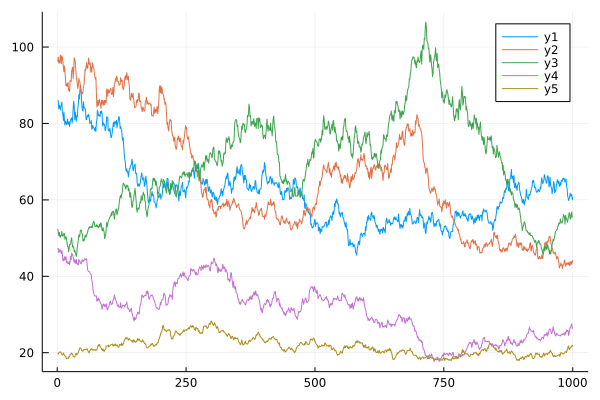

In [3]:
using Distributions
function price_sim(nstocks=100, ndays=1000)
    pdata = Matrix{Float64}(undef, (ndays, nstocks))
    for j=1:nstocks
        # j: 每只股票
        # 每只股票有自己的波动率数值
        sig = rand(Uniform(0.01, 0.02))
        pdata[:,j] .= round.(
            rand(Uniform(10.0, 100.0)) .* 
            exp.(cumsum(randn(ndays) .* sig)), 
            digits = 2)
    end
    return pdata 
end 

pdata = price_sim(100, 1000);

using Plots
Plots.gr()
Plots.plot(pdata[:,1:5])